In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams['font.size'] = 16

In [14]:
# read csv files
file_dir = '../csv_files/'
train_set = 'dips'
test_set = 'db5_test'
model = 'model_1_1'
num_samples = 120
num_steps = 40

df_list = []
for i in range(1):
    file_name = f'{test_set}_{model}_{num_samples}_samples_{num_steps}_steps_{train_set}_{i}'
    df = pd.read_csv(f'{file_dir}{file_name}.csv')
    df['run'] = i
    df_list.append(df)

In [15]:
def sort_df(df_list, score='energy'):
    df = pd.concat(df_list)
    if score == 'energy':
        result_df = df.copy().sort_values(by=score, ascending=True).groupby('id')
    elif score == 'confidence_logits':
        result_df = df.copy().sort_values(by=score, ascending=False).groupby('id')
    top1 = result_df.head(1).copy()
    top5 = result_df.head(5).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top10 = result_df.head(10).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top25 = result_df.head(25).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    top40 = result_df.head(40).sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    best = df.sort_values(by='DockQ', ascending=False).groupby('id').head(1).copy()
    # merge dataframes
    top1['method'] = 'Top-1'
    top5['method'] = 'Top-5'
    top10['method'] = 'Top-10'
    top25['method'] = 'Top-25'
    best['method'] = 'Oracle'

    # merge the dataframes 
    df_merged = pd.concat([top1, top5, top10, top25, best])

    # get the order
    cols = ['Top-1', 'Top-5', 'Top-10', 'Top-25', 'Oracle']

    df_merged['method'] = pd.Categorical(df_merged['method'], categories=cols, ordered=True)

    # separate for each metric
    df_DockQ = df_merged.pivot(index='id', columns='method', values='DockQ')[cols]

    df_sr = pd.DataFrame()
    df_sr['Acceptable'] = df_DockQ[(df_DockQ >= 0.23)].count() / df_DockQ.shape[0]
    df_sr['Medium'] = df_DockQ[(df_DockQ >= 0.49)].count() / df_DockQ.shape[0]
    df_sr['High'] = df_DockQ[(df_DockQ >= 0.8)].count() / df_DockQ.shape[0]
    df_sr = df_sr.reset_index()
    return df_sr, top1, best

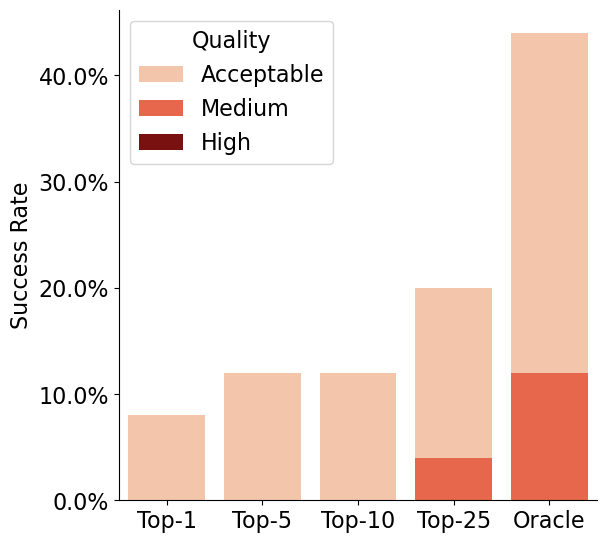

In [16]:
df_sr, top1, best = sort_df(df_list, score='energy')
melted_df = pd.melt(df_sr, id_vars='method', var_name='Quality', value_name='Success Rate')

# Define custom colors for pastel red, muted red, and dark red
custom_palette = ["#FFC3A0", "#FF5733", "#8B0000"]

g = sns.catplot(
    data=melted_df, 
    kind='bar', 
    x='method', 
    y='Success Rate', 
    hue='Quality', 
    dodge=False, 
    palette=custom_palette,
    height=6,
    aspect=1,
    legend_out=False,
) 

g.set_xlabels("")
g.ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#plt.ylim(0, 0.5)
plt.xticks(rotation=0)
#plt.savefig('DFMDock_db5_ab_ag.png', dpi=300, bbox_inches="tight")
plt.show()

In [17]:
merged_df = pd.merge(top1, best, on='id', suffixes=('_top1', '_best'))
merged_df

,id,index_top1,c_rmsd_top1,i_rmsd_top1,l_rmsd_top1,fnat_top1,DockQ_top1,energy_top1,confidence_logits_top1,num_clashes_top1,...,c_rmsd_best,i_rmsd_best,l_rmsd_best,fnat_best,DockQ_best,energy_best,confidence_logits_best,num_clashes_best,run_best,method_best
0,2SNI,21,7.281211,7.439938,17.477367,0.062500,0.097615,-0.695191,-0.002210,10,...,1.414013,1.320886,3.755819,0.656250,0.685381,-0.690236,0.021813,5,0,Oracle
1,2SIC,33,3.296305,2.626020,8.515864,0.657143,0.467407,-0.691659,0.051307,7,...,1.818859,1.320985,5.743261,0.685714,0.645159,-0.688748,0.057321,4,0,Oracle
2,1QA9,12,13.769279,9.840496,35.634422,0.375000,0.150514,-0.690528,0.016935,0,...,2.012246,1.654353,5.478788,1.000000,0.719222,-0.687340,0.026099,0,0,Oracle
3,1NW9,116,6.104705,7.660113,13.596067,0.000000,0.105982,-0.690312,0.025047,1,...,11.330243,12.624406,21.833841,0.285714,0.143749,-0.687589,0.022126,2,0,Oracle
4,2A9K,66,21.004137,11.969499,42.723896,0.000000,0.017846,-0.689564,0.051370,0,...,13.904783,13.731860,33.325813,0.000000,0.024291,-0.685113,0.060296,0,0,Oracle
5,4POU,1,11.064196,9.474049,19.580366,0.000000,0.061007,-0.688325,0.082013,6,...,4.879708,5.291321,8.678720,0.000000,0.187994,-0.684147,0.080449,0,0,Oracle
6,1VFB,80,11.963109,12.547978,22.780478,0.000000,0.045433,-0.686788,0.123614,3,...,10.584490,10.765584,18.518456,0.000000,0.064355,-0.685323,0.131436,1,0,Oracle
7,2AYO,97,1.850449,2.583437,4.582613,0.000000,0.342307,-0.685763,0.018357,0,...,1.210550,1.822949,2.966023,0.142857,0.479345,-0.683021,0.016119,0,0,Oracle
8,5HGG,30,12.428219,9.440497,35.938366,0.064516,0.047372,-0.685742,0.053931,7,...,2.972210,2.088949,8.369286,0.580645,0.476199,-0.681319,0.045564,3,0,Oracle
9,3SZK,55,19.219347,12.474917,55.388870,0.000000,0.012420,-0.685426,0.050713,2,...,19.243862,11.433510,49.288780,0.000000,0.015267,-0.681662,0.051045,7,0,Oracle


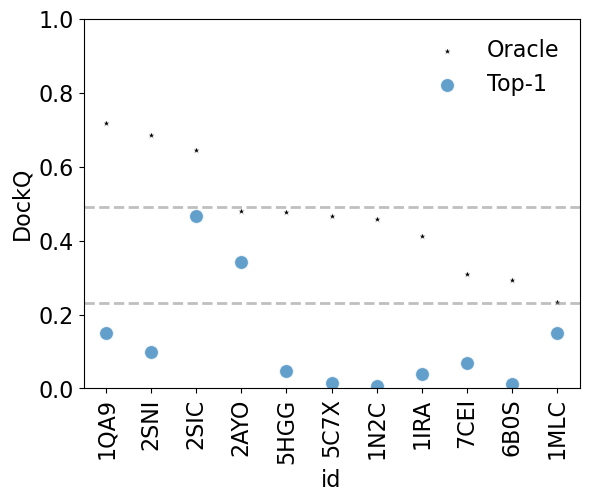

In [18]:
merged_df = merged_df.sort_values(by='DockQ_best', ascending=False)
filtered_df = merged_df[merged_df['DockQ_best'] >= 0.23]

sns.scatterplot(data=filtered_df, x='id', y='DockQ_best', label='Oracle', color='black', marker='*', s=30, alpha=1.0)
sns.scatterplot(data=filtered_df, x='id', y='DockQ_top1', label='Top-1', marker='o', s=100, alpha=0.7)
plt.axhline(y=0.23, color='grey', linestyle='--', alpha=0.5, lw=2.0)
plt.axhline(y=0.49, color='grey', linestyle='--', alpha=0.5, lw=2.0)
plt.xticks(rotation=90)  # Rotate x-ticks by 90 degrees
plt.legend(frameon=False)
plt.ylabel('DockQ')
plt.ylim(0, 1)
plt.show()

In [19]:
filtered_df

,id,index_top1,c_rmsd_top1,i_rmsd_top1,l_rmsd_top1,fnat_top1,DockQ_top1,energy_top1,confidence_logits_top1,num_clashes_top1,...,c_rmsd_best,i_rmsd_best,l_rmsd_best,fnat_best,DockQ_best,energy_best,confidence_logits_best,num_clashes_best,run_best,method_best
2,1QA9,12,13.769279,9.840496,35.634422,0.375000,0.150514,-0.690528,0.016935,0,...,2.012246,1.654353,5.478788,1.000000,0.719222,-0.687340,0.026099,0,0,Oracle
0,2SNI,21,7.281211,7.439938,17.477367,0.062500,0.097615,-0.695191,-0.002210,10,...,1.414013,1.320886,3.755819,0.656250,0.685381,-0.690236,0.021813,5,0,Oracle
1,2SIC,33,3.296305,2.626020,8.515864,0.657143,0.467407,-0.691659,0.051307,7,...,1.818859,1.320985,5.743261,0.685714,0.645159,-0.688748,0.057321,4,0,Oracle
7,2AYO,97,1.850449,2.583437,4.582613,0.000000,0.342307,-0.685763,0.018357,0,...,1.210550,1.822949,2.966023,0.142857,0.479345,-0.683021,0.016119,0,0,Oracle
8,5HGG,30,12.428219,9.440497,35.938366,0.064516,0.047372,-0.685742,0.053931,7,...,2.972210,2.088949,8.369286,0.580645,0.476199,-0.681319,0.045564,3,0,Oracle
21,5C7X,91,16.149286,19.209984,42.151802,0.000000,0.015045,-0.677063,0.046716,23,...,2.137699,2.594590,5.798322,0.470588,0.467843,-0.673597,0.057082,1,0,Oracle
24,1N2C,60,35.643410,19.029064,78.887802,0.000000,0.005884,-0.671360,0.008575,136,...,3.829993,3.851810,8.325725,0.734694,0.458911,-0.661346,0.027027,35,0,Oracle
18,1IRA,95,13.264153,15.807622,24.214020,0.000000,0.039544,-0.679169,0.001257,16,...,3.636182,4.264062,6.914876,0.523809,0.411895,-0.673528,0.015743,5,0,Oracle
11,7CEI,80,10.941012,10.105330,17.647049,0.000000,0.069957,-0.683584,0.035667,0,...,3.415363,2.177266,10.195088,0.200000,0.310645,-0.681054,0.021922,0,0,Oracle
15,6B0S,47,16.691284,16.545538,52.445564,0.000000,0.011249,-0.682290,0.050791,8,...,6.287421,5.909941,20.144617,0.666667,0.292774,-0.674346,0.061859,8,0,Oracle


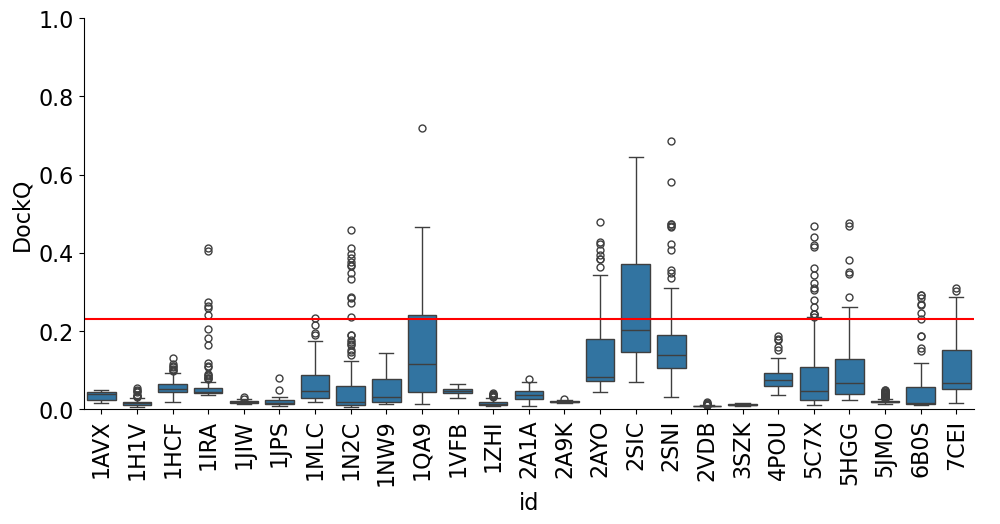

In [20]:
sns.catplot(data=df, x='id', y='DockQ', kind='box', height=5, aspect=2)
plt.xticks(rotation=90)
plt.axhline(y = 0.23, color='r')
plt.ylim(0, 1)
plt.show()